In [13]:
SAVE_PATH = '/home/alicja/sokoban-12-12-4-trajectories'

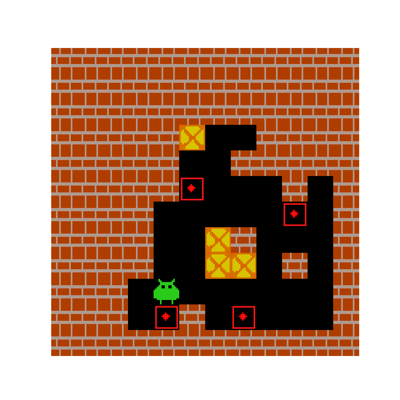

In [24]:
from envs.sokoban.sokoban_env import CustomSokobanGenerator, CustomSokobanEnv
from utils.jax_rand import set_seed
import numpy as np
from envs.sokoban.gen_sokoban import from_jumanji
import pickle
from PIL import Image
from IPython.display import display

set_seed(0)

env = CustomSokobanEnv(grid_size=12, generator=CustomSokobanGenerator, boards_path=f'{SAVE_PATH}/eval_boards.pkl')

state = env.reset()

actions = env.get_all_actions()
for i in range(100):
    action = np.random.choice(actions)
    state, _, _, _ = env.step(state, action)
    array_image = env.render(state)
    image = Image.fromarray(array_image)
    display(image.resize((400, 400)))
    import time
    time.sleep(0.2)

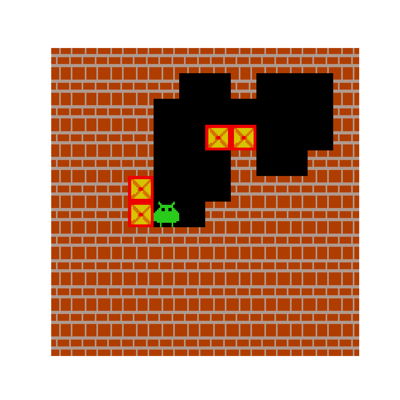

In [25]:
with open(f'{SAVE_PATH}/test/test_trajectories.pkl', 'rb') as f:
    trajectories = pickle.load(f)
with open(f'{SAVE_PATH}/test/test_lens.pkl', 'rb') as f:
    lens = pickle.load(f)

trajectory = trajectories[0][:lens[0]]

for state in trajectory[:-1]:
    array_image = env.render(np.array(state.flatten()))
    image = Image.fromarray(array_image)
    display(image.resize((400, 400)))
    import time
    time.sleep(0.2)